In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import scipy.stats as stats
import seaborn as sns
import pingouin as pg
from sklearn.linear_model import LinearRegression
import random
import warnings
import statsmodels.formula.api as smf
from matplotlib.lines import Line2D
import statsmodels.api as sm
from statsmodels.stats.sandwich_covariance import cov_cluster
from statsmodels.stats.anova import anova_lm

/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/1401463414.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow1 = mpatches.FancyArrow(200, 1.075, 190, 0, width=0.01, color='#051094', edgecolor='lightgray', head_width=.015, head_length=20, length_includes_head = True)
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/1401463414.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow2 = mpatches.FancyArrow(200,1, -90, 0, width=0.01, color='#C80815', edgecolor='lightgray', head_width=.015, head_length=20, length_includes_head = True)


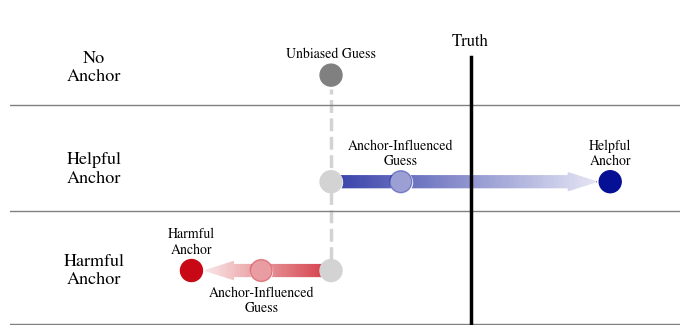

In [2]:
fig, ax = plt.subplots(figsize=(7, 3.45))

colors = ['grey','lightgrey','#051094','#051094','#C80815', '#C80815', 'lightgrey']
values = [200, 200, 250, 400, 100, 150, 200]
ys = [1.165, 1.075,1.075,1.075,1,1,1]
alphas = [1, 1, .4, 1, 1, .4, 1]


ax.axvline(x=200, ymin = 0.15, ymax=0.75, color='lightgray', linestyle='--', linewidth=2.5)

# Gradient Arrows
def create_gradient(x_1, x_2, y, n, direction):
    delta_x = (x_2 - x_1) / n   
    for i in range(n):
        if direction:
            alpha_val = .2 + (i/n * .7)
        else:
            alpha_val = .9 - (i/n * .7)
        ax.add_patch(mpatches.Rectangle((x_1+delta_x*i, y), delta_x, .05, fill=True, lw=0, color='w', alpha=alpha_val))
arrow1 = mpatches.FancyArrow(200, 1.075, 190, 0, width=0.01, color='#051094', edgecolor='lightgray', head_width=.015, head_length=20, length_includes_head = True)
arrow2 = mpatches.FancyArrow(200,1, -90, 0, width=0.01, color='#C80815', edgecolor='lightgray', head_width=.015, head_length=20, length_includes_head = True)
ax.add_patch(arrow1)
ax.add_patch(arrow2)
create_gradient(200, 390, 1.05, 100, True)
create_gradient(110, 200, .975, 80, False)

scatter = ax.scatter(values, ys, s=250, c='white', marker='o')
scatter = ax.scatter(values, ys, s=250, c=colors, marker='o', alpha = alphas)



labels = ["Unbiased Guess",
        "Anchor-Influenced\nGuess", 
        "Helpful\nAnchor",
        "Harmful\nAnchor", 
        "Anchor-Influenced\nGuess"]

xs = [200, 250, 400, 100, 150]
ys = [1.165, 1.075,1.075,1,1]
for i, txt in enumerate(labels):
    if i == 4:
        m = -30
    else:
        m = 12 # use cambria font
    ax.annotate(txt, (xs[i], ys[i]), textcoords="offset points", xytext=(0,m), ha='center', fontsize=10, fontname='times')

ax.annotate("Truth", (300, 1.19), textcoords="offset points", xytext=(0,0), ha='center', fontsize=12, weight='bold', fontname='times')
ax.annotate("No\nAnchor", (30, 1.16), textcoords="offset points", xytext=(0,0), ha='center', fontsize=13, weight='bold', fontname='times')
ax.annotate("Helpful\nAnchor", (30, 1.08), textcoords="offset points", xytext=(0,-5), ha='center', fontsize=13, weight='bold', fontname='times')
ax.annotate("Harmful\nAnchor", (30, 1), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=13, weight='bold', fontname='times')


ax.axhline(y=1.14, color='gray', linestyle='-', linewidth=1)
ax.axhline(y=1.05, color='gray', linestyle='-', linewidth=1)
ax.axhline(y=0.955, color='gray', linestyle='-', linewidth=1)


ax.set_ylim(0.954, 1.22)
ax.axvline(x=300, ymin = 0, ymax=0.85, color='k', linestyle='-', linewidth=2.5)
ax.set_xlim(-30, 450)
ax.set_xticks([])
ax.get_yaxis().set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig('Figures/Figure-1_Types-of-Anchors.png', dpi=300)
plt.show()


/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/2397007497.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow1 = mpatches.FancyArrow(200, 1.075, 190, 0, width=0.01, color='grey', edgecolor='lightgray', head_width=.015, head_length=20, length_includes_head = True)
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/2397007497.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow2 = mpatches.FancyArrow(200,1, -90, 0, width=0.01, color='grey', edgecolor='lightgray', head_width=.015, head_length=20, length_includes_head = True)


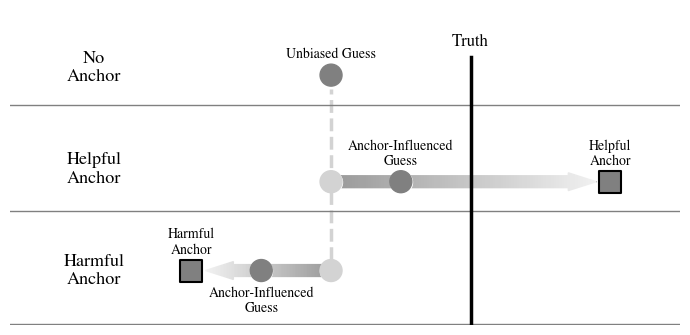

In [51]:
fig, ax = plt.subplots(figsize=(7, 3.45))

colors = ['grey','lightgrey','grey', 'grey', 'lightgrey']
values = [200, 200, 250, 150, 200]
ys = [1.165, 1.075,1.075,1,1]
alphas = [1, 1, 1, 1, 1]




ax.axvline(x=200, ymin = 0.15, ymax=0.75, color='lightgray', linestyle='--', linewidth=2.5)

# Gradient Arrows
def create_gradient(x_1, x_2, y, n, direction):
    delta_x = (x_2 - x_1) / n   
    for i in range(n):
        if direction:
            alpha_val = .2 + (i/n * .7)
        else:
            alpha_val = .9 - (i/n * .7)
        ax.add_patch(mpatches.Rectangle((x_1+delta_x*i, y), delta_x, .05, fill=True, lw=0, color='w', alpha=alpha_val))
arrow1 = mpatches.FancyArrow(200, 1.075, 190, 0, width=0.01, color='grey', edgecolor='lightgray', head_width=.015, head_length=20, length_includes_head = True)
arrow2 = mpatches.FancyArrow(200,1, -90, 0, width=0.01, color='grey', edgecolor='lightgray', head_width=.015, head_length=20, length_includes_head = True)
ax.add_patch(arrow1)
ax.add_patch(arrow2)
create_gradient(200, 390, 1.05, 100, True)
create_gradient(110, 200, .975, 80, False)

scatter = ax.scatter(values, ys, s=250, c='white', marker='o')
scatter = ax.scatter(values, ys, s=250, c=colors, marker='o', alpha = alphas)

anchor_cols = ['grey','grey']
anchor_vals = [400, 100]
anchor_ys = [1.075, 1]
alphas = [1,1]
scatter = ax.scatter(anchor_vals, anchor_ys, s=250, c=anchor_cols, marker='s', alpha = alphas, edgecolor='black', linewidth=1.5)

labels = ["Unbiased Guess",
        "Anchor-Influenced\nGuess", 
        "Helpful\nAnchor",
        "Harmful\nAnchor", 
        "Anchor-Influenced\nGuess"]

xs = [200, 250, 400, 100, 150]
ys = [1.165, 1.075,1.075,1,1]
for i, txt in enumerate(labels):
    if i == 4:
        m = -30
    else:
        m = 12 # use cambria font
    ax.annotate(txt, (xs[i], ys[i]), textcoords="offset points", xytext=(0,m), ha='center', fontsize=10, fontname='times')

ax.annotate("Truth", (300, 1.19), textcoords="offset points", xytext=(0,0), ha='center', fontsize=12, weight='bold', fontname='times')
ax.annotate("No\nAnchor", (30, 1.16), textcoords="offset points", xytext=(0,0), ha='center', fontsize=13, weight='bold', fontname='times')
ax.annotate("Helpful\nAnchor", (30, 1.08), textcoords="offset points", xytext=(0,-5), ha='center', fontsize=13, weight='bold', fontname='times')
ax.annotate("Harmful\nAnchor", (30, 1), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=13, weight='bold', fontname='times')


ax.axhline(y=1.14, color='gray', linestyle='-', linewidth=1)
ax.axhline(y=1.05, color='gray', linestyle='-', linewidth=1)
ax.axhline(y=0.955, color='gray', linestyle='-', linewidth=1)


ax.set_ylim(0.954, 1.22)
ax.axvline(x=300, ymin = 0, ymax=0.85, color='k', linestyle='-', linewidth=2.5)
ax.set_xlim(-30, 450)
ax.set_xticks([])
ax.get_yaxis().set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig('Figures/Figure-1_Types-of-Anchors-BW.png', dpi=300)
plt.show()


In [3]:
# Read in data and create composite variables
df = pd.read_csv('ci_cb_2023-06-26.csv')

df['Anchor'] = np.where(df['Condition'] == 'Low', 118, 353)
df['Mag_Rev1'] = abs(df['response_2'] - df['response_1'])
df['Mag_Rev2'] = abs(df['response_3'] - df['response_2'])
df['Mag_Rev'] = abs(df['response_3'] - df['response_1'])
df['Initial_Error'] = abs(df['response_1'] - df['true_answer'])
df['Second_Error'] = abs(df['response_2'] - df['true_answer'])
df['Final_Error'] = abs(df['response_3'] - df['true_answer'])
df['Dist_Anchor_1'] = abs(df['response_1'] - df['Anchor'])
df['Dist_Anchor_2'] = abs(df['response_2'] - df['Anchor'])
df['Dist_Anchor_3'] = abs(df['response_3'] - df['Anchor'])
df['Difference_Initial_Anchor'] = df['response_1'] - df['Anchor']
df['Difference_Initial_Truth'] = df['response_1'] - 246
df['Matched'] = np.where(df['Difference_Initial_Anchor'] * df['Difference_Initial_Truth'] > 0, 1, 0)
df['Change_accuracy'] = df['Initial_Error'] - df['Final_Error']

# Load data from previous experiment which asked this question without anchoring
df_old = pd.read_csv('pnas.1615978114.sd01.csv')
df_old = df_old.loc[(df_old.task == '4d')]
df_old = df_old.dropna(subset=['response_1'])

/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/1140659978.py:2: FutureWarning: The provided callable <function median at 0x110579080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp_con = df_con.groupby('group').agg({'response_1': np.median,  'response_2': np.median, 'response_3': np.median, 'Initial_Error': np.median,
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/1140659978.py:14: FutureWarning: The provided callable <function median at 0x110579080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby('group').agg({'response_1': np.median,  'response_2': np.median, 'response_3': np.median, 'Initial_Error': np.median,


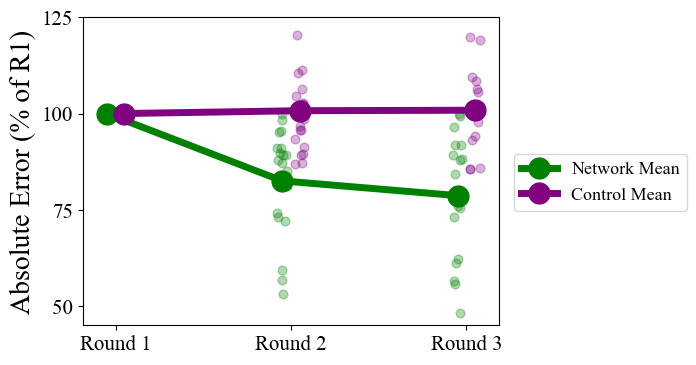

In [4]:
df_con = df.loc[df.Net_type == 'Control'].dropna(subset=['response_1', 'response_2', 'response_3'])
df_temp_con = df_con.groupby('group').agg({'response_1': np.median,  'response_2': np.median, 'response_3': np.median, 'Initial_Error': np.median,
                                            'Second_Error': np.median, 'Final_Error': np.median, 'Anchor': 'first', 'Condition': 'first'})

df_temp_con['Final_Error'] = df_temp_con['Final_Error'] / df_temp_con['Initial_Error'] * 100
df_temp_con['Second_Error'] = df_temp_con['Second_Error'] / df_temp_con['Initial_Error'] * 100
df_temp_con['Initial_Error'] = 100


df_con = df_temp_con


df_temp = df.loc[df.Net_type == 'Network'].dropna(subset=['response_1', 'response_2', 'response_3'])
df_temp = df_temp.groupby('group').agg({'response_1': np.median,  'response_2': np.median, 'response_3': np.median, 'Initial_Error': np.median,
                                              'Second_Error': np.median, 'Final_Error': np.median, 'Anchor': 'first', 'Condition': 'first'})
df_temp['Final_Error'] = df_temp['Final_Error'] / df_temp['Initial_Error'] * 100
df_temp['Second_Error'] = df_temp['Second_Error'] / df_temp['Initial_Error'] * 100
df_temp['Initial_Error'] = 100

df_net = df_temp

fig, axs = plt.subplots(1, 1, figsize=(7, 4))

axs.plot([-0.05, .95, 1.95],[df_net[i].mean() for i in ['Initial_Error', 'Second_Error', 'Final_Error']], '-o', color='green', ms = 15, lw=5, label='Network Mean')
axs.plot([0.05, 1.05, 2.05],[df_con[i].mean() for i in ['Initial_Error', 'Second_Error', 'Final_Error']], '-o', color='purple', ms = 15, lw=5, label='Control Mean')


jitter = 0.03

# Network group points
axs.scatter([-0.05 + np.random.uniform(-jitter, jitter) for _ in range(len(df_net))], df_net['Initial_Error'],
            s=40, alpha=0.3, color='green')
axs.scatter([0.95 + np.random.uniform(-jitter, jitter) for _ in range(len(df_net))], df_net['Second_Error'],
            s=40, alpha=0.3, color='green')
axs.scatter([1.95 + np.random.uniform(-jitter, jitter) for _ in range(len(df_net))], df_net['Final_Error'],
            s=40, alpha=0.3, color='green')

# Control group points
axs.scatter([0.05 + np.random.uniform(-jitter, jitter) for _ in range(len(df_con))], df_con['Initial_Error'],
            s=40, alpha=0.3, color='purple')
axs.scatter([1.05 + np.random.uniform(-jitter, jitter) for _ in range(len(df_con))], df_con['Second_Error'],
            s=40, alpha=0.3, color='purple')
axs.scatter([2.05 + np.random.uniform(-jitter, jitter) for _ in range(len(df_con))], df_con['Final_Error'],
            s=40, alpha=0.3, color='purple')

axs.set_xticks([0, 1, 2], ['Round 1', 'Round 2', 'Round 3'], fontsize=15, fontfamily='Times New Roman')
axs.set_ylabel('Absolute Error (% of R1)', fontsize=20, fontfamily='Times New Roman')
axs.set_ylim(45, 125)
axs.set_yticks([50, 75, 100, 125], ['50', '75', '100', '125'], fontsize=15, fontfamily='Times New Roman')
fig.legend(fontsize=20,loc='center right', prop={'family': 'Times New Roman', 'size': 13})
plt.subplots_adjust(right=0.72)
plt.savefig('Figures/Figure-3_Change-Error.png', dpi=300)
plt.show()



/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/3359495839.py:6: FutureWarning: The provided callable <function median at 0x110579080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Matched']).agg({'Dist_Anchor_1': np.median,'Dist_Anchor_2': np.median,'Dist_Anchor_3': np.median})
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/3359495839.py:31: FutureWarning: The provided callable <function median at 0x110579080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby(['group','Matched']).agg({'Dist_Anchor_1': np.median,'Dist_Anchor_2': np.median,'Dist_Anchor_3': np.median})


Median distance to anchor:
Helpful 146.0
Harmful 51.0
Individual level changes by group:
Networks
Means: -14.125 20.175
STD Errors: 2.4725965203873392 3.4121758569785596
Helpful WilcoxonResult(statistic=19.0, pvalue=0.0005855560302734375)
Harmful WilcoxonResult(statistic=0.0, pvalue=0.00019540793740897318)
Controls
Means: -3.45 2.975
STD Errors: 2.669996550362447 1.7264343769442083
Helpful: WilcoxonResult(statistic=65.0, pvalue=0.37180364974669)
Harmful: WilcoxonResult(statistic=45.0, pvalue=0.23385151493679546)

Differences between conditions:
Helpful: -14.125 -3.45
MannwhitneyuResult(statistic=69.5, pvalue=0.0004340060463465756)
Harmful: 20.175 2.975
MannwhitneyuResult(statistic=305.5, pvalue=0.004389968439207104)


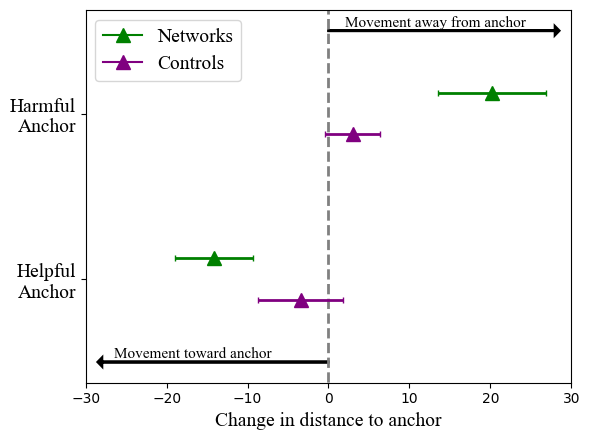

In [10]:
# Create a similar figure, except make it a single plot and insteaad of bars, plot points and 95% confidence intervals. Do this vertically
# Individual distance to the anchor
# Note for this analysis, we group participants both by group and by whether the anchor was toward or away from the truth (i.e., 'Matched')

df_temp = df.loc[df.Net_type == 'Network'].dropna(subset=['Matched', 'Dist_Anchor_1', 'Dist_Anchor_2', 'Dist_Anchor_3'])
df_temp = df_temp.groupby(['group','Matched']).agg({'Dist_Anchor_1': np.median,'Dist_Anchor_2': np.median,'Dist_Anchor_3': np.median})
df_temp['Change_in_Distance'] = df_temp['Dist_Anchor_3'] - df_temp['Dist_Anchor_1']
df_temp = df_temp.reset_index(level=['Matched'])

print('Median distance to anchor:') # For percentages, could do percentage of median distance to anchor
print('Helpful',df_temp.loc[df_temp.Matched == 1]['Dist_Anchor_1'].median())
print('Harmful',df_temp.loc[df_temp.Matched == 0]['Dist_Anchor_1'].median())

print('Individual level changes by group:')
print('Networks')
print('Means:',df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].mean(), df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].mean())
print('STD Errors:',df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()),
      df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()))

away, toward, away_cis, toward_cis = [], [], [], []
away.append(df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].mean())
toward.append(df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].mean())
away_cis.append(1.96*df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()))
toward_cis.append(1.96*df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()))
print('Helpful',stats.wilcoxon(df_temp.loc[df_temp['Matched'] == 1]['Change_in_Distance']))
print('Harmful',stats.wilcoxon(df_temp.loc[df_temp['Matched'] == 0]['Change_in_Distance']))
df_network = df_temp


df_temp = df.loc[df.Net_type == 'Control'].dropna(subset=['Matched', 'Dist_Anchor_1', 'Dist_Anchor_2', 'Dist_Anchor_3'])
df_temp = df_temp.groupby(['group','Matched']).agg({'Dist_Anchor_1': np.median,'Dist_Anchor_2': np.median,'Dist_Anchor_3': np.median})
df_temp['Change_in_Distance'] = df_temp['Dist_Anchor_3'] - df_temp['Dist_Anchor_1']

# Make matched into a column
df_temp = df_temp.reset_index(level=['Matched'])

print('Controls')
print('Means:',df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].mean(), df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].mean())
print('STD Errors:',df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()),
      df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()))

away.append(df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].mean())
toward.append(df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].mean())
away_cis.append(1.96*df_temp.loc[df_temp.Matched == 0]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()))
toward_cis.append(1.96*df_temp.loc[df_temp.Matched == 1]['Change_in_Distance'].std() / np.sqrt(df_temp['Change_in_Distance'].count()))
print('Helpful:',stats.wilcoxon(df_temp.loc[df_temp['Matched'] == 1]['Change_in_Distance']))
print('Harmful:',stats.wilcoxon(df_temp.loc[df_temp['Matched'] == 0]['Change_in_Distance']))
df_individuals = pd.DataFrame({'Away':away, 'Toward':toward, 'Away_cis':away_cis, 'Toward_cis':toward_cis})
df_control = df_temp

print('\nDifferences between conditions:')
print('Helpful:',df_network.loc[df_network.Matched == 1]['Change_in_Distance'].mean(), df_control.loc[df_control.Matched == 1]['Change_in_Distance'].mean())
print(stats.mannwhitneyu(df_network.loc[df_network.Matched == 1]['Change_in_Distance'], df_control.loc[df_control.Matched == 1]['Change_in_Distance']))
print('Harmful:',df_network.loc[df_network.Matched == 0]['Change_in_Distance'].mean(), df_control.loc[df_control.Matched == 0]['Change_in_Distance'].mean())
print(stats.mannwhitneyu(df_network.loc[df_network.Matched == 0]['Change_in_Distance'], df_control.loc[df_control.Matched == 0]['Change_in_Distance']))





fig, axs = plt.subplots(1, 1, figsize=(6, 4.5))
axs.plot([0,0],[-1,5],'--',color='gray',lw=2)
df_individual = df_individuals
axs.plot(df_individual['Away'].iloc[0], [3.75],color='green', ms=10, marker = '^', label = 'Networks')
axs.errorbar(df_individual['Away'].iloc[0], [3.75], xerr=df_individual['Away_cis'].iloc[0], fmt='none', ecolor='green', capsize=2, lw=2)
axs.plot(df_individual['Away'].iloc[1], [3.25],color='purple', ms=10, marker = '^', label = 'Controls')
axs.errorbar(df_individual['Away'].iloc[1], [3.25], xerr=df_individual['Away_cis'].iloc[1], fmt='none', ecolor='purple', capsize=2, lw=2)


axs.plot(df_individual['Toward'].iloc[0], [1.75],color='green', ms=10, marker = '^')
axs.errorbar(df_individual['Toward'].iloc[0], [1.75], xerr=df_individual['Toward_cis'].iloc[0], fmt='none', ecolor='green', capsize=2, lw=2)
axs.plot(df_individual['Toward'].iloc[1], [1.25],color='purple', ms=10, marker = '^')
axs.errorbar(df_individual['Toward'].iloc[1], [1.25], xerr=df_individual['Toward_cis'].iloc[1], fmt='none', ecolor='purple', capsize=2, lw=2)

axs.arrow(0, 4.5, 28, 0, head_width=0.1, head_length=0.5, fc='k', ec='k', lw=2)
axs.arrow(0, 0.5, -28, 0, head_width=0.1, head_length=0.5, fc='k', ec='k', lw=2)


axs.set_yticks([1.5,3.5])
axs.set_yticklabels(['Helpful\nAnchor', 'Harmful\nAnchor'],fontsize=14, fontname='Times New Roman')
axs.set_xlabel('Change in distance to anchor',fontsize=14, fontname='Times New Roman')
axs.text(2,4.55,'Movement away from anchor',fontsize=11, fontname='Times New Roman')
axs.text(-26.5,0.55,'Movement toward anchor',fontsize=11, fontname='Times New Roman')
axs.set_ylim(0.25,4.75)
axs.set_xlim(-30,30)
# Specify legend font = times
axs.legend(loc='upper left', prop={'family': 'Times New Roman', 'size':14})
plt.tight_layout()
plt.savefig('Figures/Figure-2_Change-to-Anchor.png', dpi=300)
plt.show()


/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/1575158697.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['initial_confidence_rank'] = df.initial_confidence.replace({'Not at all confident': 1, 'Not too confident': 2, 'Somewhat confident': 3, 'Very confident': 4})
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_86931/1575158697.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['neighbor_confidence_rank'] = df.neighbor_confidence.replace({'Not at all confident': 1, 'Not too confident': 2, 'So

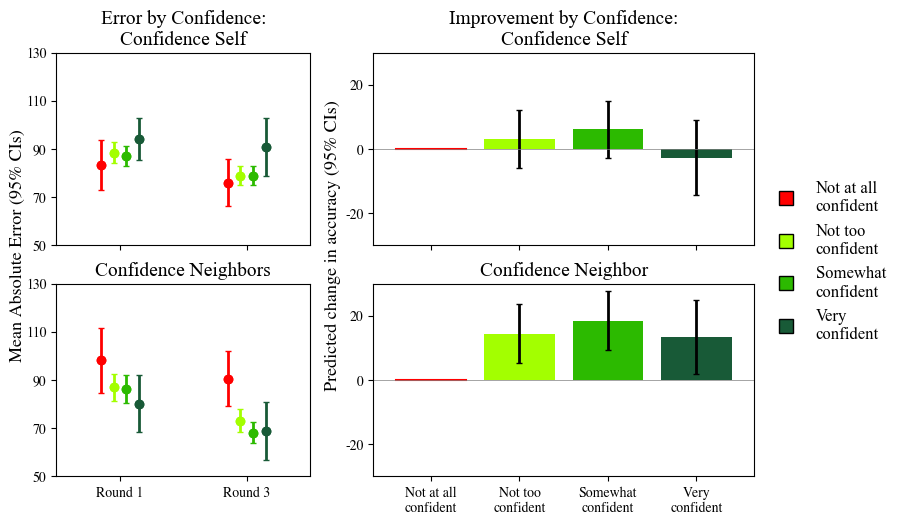

In [23]:
# Plot these results



df['initial_confidence_rank'] = df.initial_confidence.replace({'Not at all confident': 1, 'Not too confident': 2, 'Somewhat confident': 3, 'Very confident': 4})
df['neighbor_confidence_rank'] = df.neighbor_confidence.replace({'Not at all confident': 1, 'Not too confident': 2, 'Somewhat confident': 3, 'Very confident': 4})
df['final_confidence_rank'] = df.final_confidence.replace({'Not at all confident': 1, 'Not too confident': 2, 'Somewhat confident': 3, 'Very confident': 4})

### INITIAL Confidence in Self
df_temp = df.loc[df.Net_type == 'Network']
df_temp = df_temp[['initial_confidence_rank', 'Initial_Error','Final_Error']].dropna()
df_temp = df_temp.loc[df_temp.Initial_Error < 492]
df_temp['initial_confidence_rank'] = df_temp.initial_confidence_rank.astype(int)
df_temp['Initial_Error'] = df_temp.Initial_Error.astype(float)
df_temp['Final_Error'] = df_temp.Final_Error.astype(float)
df_temp['initial_confidence_rank'] = df_temp.initial_confidence_rank.astype(str)
model_1_noc = smf.ols('Final_Error ~ Initial_Error', data=df_temp).fit()
model_1 = smf.ols('Final_Error ~ Initial_Error + initial_confidence_rank', data=df_temp).fit()

# Final Confidence in self
df_temp = df.loc[df.Net_type == 'Network']
df_temp = df_temp[['final_confidence_rank', 'Initial_Error','Final_Error']].dropna()
df_temp = df_temp.loc[df_temp.Initial_Error < 492]
df_temp['final_confidence_rank'] = df_temp.final_confidence_rank.astype(int)
df_temp['Initial_Error'] = df_temp.Initial_Error.astype(float)
df_temp['Final_Error'] = df_temp.Final_Error.astype(float)
df_temp['final_confidence_rank'] = df_temp.final_confidence_rank.astype(str)
model_1_nocb = smf.ols('Final_Error ~ Initial_Error', data=df_temp).fit()
model_1b = smf.ols('Final_Error ~ Initial_Error + final_confidence_rank', data=df_temp).fit()


# Confidence in neighbors
df_temp = df.loc[df.Net_type == 'Network']
df_temp = df_temp[['neighbor_confidence_rank', 'Initial_Error','Final_Error']].dropna()
df_temp = df_temp.loc[df_temp.Initial_Error < 492]
df_temp = df_temp.loc[df_temp.neighbor_confidence_rank != 'None']
df_temp['neighbor_confidence_rank'] = df_temp.neighbor_confidence_rank.astype(int)
df_temp['Initial_Error'] = df_temp.Initial_Error.astype(float)
df_temp['Final_Error'] = df_temp.Final_Error.astype(float)

# Change neighborhood_confidence_rank to a categorical variable
df_temp['neighbor_confidence_rank'] = df_temp.neighbor_confidence_rank.astype(str)
model_2_noc = smf.ols('Final_Error ~ Initial_Error', data=df_temp).fit()
model_2 = smf.ols('Final_Error ~ Initial_Error + neighbor_confidence_rank', data=df_temp).fit()



fig, axs = plt.subplots(2,2,figsize=(9,5.5),gridspec_kw={'width_ratios': [1, 1.5]})

# Confidence in self -------------------------------------------
options = ['Not at all confident', 'Not too confident', 'Somewhat confident', 'Very confident']
colors = ['#ff0000','#a3ff00','#2cba00','#185a37']
df_temp = df.dropna(subset=['initial_confidence'])
df_temp = df_temp.loc[df_temp.response_1 < 492]
df_temp['Accuracy_1'] = abs(df_temp.response_1 - 246)
df_temp['Accuracy_3'] = abs(df_temp.response_3 - 246)

i = 0
for o in options:
    df_t = df_temp.loc[df_temp.initial_confidence == o]
    axs[0,0].plot([0.85+i,1.85+i],[df_t['Accuracy_1'].mean(), df_t['Accuracy_3'].mean()], color=colors[int(i*10)],marker='o',linestyle='None')
    axs[0,0].errorbar([0.85+i,1.85+i],[df_t['Accuracy_1'].mean(), df_t['Accuracy_3'].mean()],
                [1.96 * df_t[i].std()/np.sqrt(df_t[i].count()) for i in ['Accuracy_1', 'Accuracy_3']],
                capsize=2, color=colors[int(i*10)],lw=2, marker='o',linestyle='None')
    i += 0.1

axs[0,0].set_xticks([1,2])
axs[0,0].set_xticklabels(['',''])
axs[0,0].set_xlim(0.5,2.5)
axs[0,0].set_title('Error by Confidence:\nConfidence Self', fontsize = 14, fontname='Times New Roman')
axs[0,0].set_yticks([50,70,90,110,130])
axs[0,0].set_yticklabels([50,70,90,110,130], fontsize = 11, font = 'times')
axs[0,0].set_ylim(50,130)


# Confidence in neighbors -------------------------------------------
options = ['Not at all confident', 'Not too confident', 'Somewhat confident', 'Very confident']
df_temp = df.dropna(subset=['initial_confidence'])
df_temp = df_temp.loc[df_temp.response_1 < 492]
df_temp['Accuracy_1'] = abs(df_temp.response_1 - 246)
df_temp['Accuracy_3'] = abs(df_temp.response_3 - 246)

i = 0
for o in options:
    df_t = df_temp.loc[df_temp.neighbor_confidence == o]
    axs[1,0].plot([0.85+i,1.85+i],[df_t['Accuracy_1'].mean(), df_t['Accuracy_3'].mean()], color=colors[int(i*10)],marker='o',linestyle='None',label='Control')
    axs[1,0].errorbar([0.85+i,1.85+i],[df_t['Accuracy_1'].mean(), df_t['Accuracy_3'].mean()],
                [1.96 * df_t[i].std()/np.sqrt(df_t[i].count()) for i in ['Accuracy_1', 'Accuracy_3']],
                capsize=2, color=colors[int(i*10)],lw=2, marker='o',linestyle='None')
    i += 0.1

axs[1,0].set_xticks([1,2])
axs[1,0].set_xticklabels(['Round 1', 'Round 3'], fontsize = 12, font='times')
axs[1,0].set_ylabel('Mean Absolute Error (95% CIs)', fontsize = 13, font = 'times')
axs[1,0].set_yticks([50,70,90,110,130])
axs[1,0].set_yticklabels([50,70,90,110,130], fontsize = 11, font = 'times')
axs[1,0].yaxis.set_label_coords(-0.12,1.2)
axs[1,0].set_xlim(0.5,2.5)
axs[1,0].set_title('Confidence Neighbors', fontsize = 14, fontname='Times New Roman')
axs[1,0].set_ylim(50,130)



# Create a bar plot of the change in accuracy for each confidence level
i = 1
for o in options[:-1]:
    axs[0,1].bar([0+i],[-model_1.params[i]], color=colors[i],label='Control')
    axs[0,1].errorbar([0+i],[-model_1.params[i]],
                [1.96 * model_1.bse[i]],
                capsize=2, color='black',lw=2)
    i += 1
axs[0,1].set_xticks([0,1,2,3])
axs[0,1].plot([-.4,.4],[0,0],'-',color=colors[0])
axs[0,1].set_xticklabels(["","","",""])
axs[0,1].set_title('Improvement by Confidence:\nConfidence Self', fontsize = 14,  fontname='Times New Roman')
axs[0,1].set_yticks([-40,-20,0, 20,40])
axs[0,1].set_yticklabels([-40,-20,0, 20,40],fontsize=11, font='times')
axs[0,1].set_ylim(-30,30)
axs[0,1].plot([-1,5],[0,0],'-',color='gray',lw=0.5)
axs[0,1].set_xlim(-.65,3.65)

# Confidence in neighbors -------------------------------------------
options = ['Not at all\nconfident', 'Not too\nconfident', 'Somewhat\nconfident', 'Very\nconfident']

i = 1
for o in options[:-1]:
    axs[1,1].bar([0+i],[-model_2.params[i]], color=colors[i],label='Control')
    axs[1,1].errorbar([0+i],[-model_2.params[i]],
                [1.96 * model_2.bse[i]],
                capsize=2, color='black',lw=2)
    i += 1
axs[1,1].set_xticks([0,1,2,3])
axs[1,1].set_yticks([-40,-20,0, 20,40])
axs[1,1].plot()
axs[1,1].set_yticklabels([-40,-20,0, 20,40],fontsize=11, font = 'times')
axs[1,1].plot([-.4,.4],[0,0],'-',color=colors[0])
axs[1,1].set_xticklabels(options, fontsize = 12, font = 'times')
axs[1,1].set_ylabel('Predicted change in accuracy (95% CIs)', fontsize = 13, font='times')
axs[1,1].yaxis.set_label_coords(-0.085,1.2)
axs[1,1].plot([-1,5],[0,0],'-',color='gray',lw=0.5)
axs[1,1].set_xlim(-.65,3.65)
axs[1,1].set_title('Confidence Neighbor', fontsize = 14, fontname='Times New Roman')
axs[1,1].set_ylim(-30,30)

legend_elements = [
    Line2D([0], [0], marker='s', color='none',
           markerfacecolor=c, markersize=10, label=opt)
    for opt, c in zip(options, colors)
]
fig.legend(
    handles=legend_elements,
    labels=options,
    loc='center left',
    bbox_to_anchor=(0.9, 0.5),
    frameon=False,
    prop={'family': 'Times New Roman', 'size': 12}
)

plt.savefig(
    'Figures/Figure-4_Confidence.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1
)
plt.show()


In [10]:
# Updated crowd level results with table
df = pd.read_csv('ci_cb_2023-06-26.csv')

df['Anchor'] = np.where(df['Condition'] == 'Low', 118, 353)
df['Mag_Rev1'] = abs(df['response_2'] - df['response_1'])
df['Mag_Rev2'] = abs(df['response_3'] - df['response_2'])
df['Mag_Rev'] = abs(df['response_3'] - df['response_1'])
df['Initial_Error'] = abs(df['response_1'] - df['true_answer'])
df['Second_Error'] = abs(df['response_2'] - df['true_answer'])
df['Final_Error'] = abs(df['response_3'] - df['true_answer'])
df['Dist_Anchor_1'] = abs(df['response_1'] - df['Anchor'])
df['Dist_Anchor_2'] = abs(df['response_2'] - df['Anchor'])
df['Dist_Anchor_3'] = abs(df['response_3'] - df['Anchor'])
df['Difference_Initial_Anchor'] = df['response_1'] - df['Anchor']
df['Difference_Initial_Truth'] = df['response_1'] - 246
df['Matched'] = np.where(df['Difference_Initial_Anchor'] * df['Difference_Initial_Truth'] > 0, 1, 0)
df['Change_accuracy'] = df['Initial_Error'] - df['Final_Error']


df_temp = df.loc[df.Net_type == 'Network']
df_temp = df_temp.groupby('group').agg({'response_1': np.median,  'response_2': np.median, 'response_3': np.median, 'Anchor': 'first', 'Condition': 'first'})

# Calculate the difference between response 1/3 and anchor and how it changes across rounds
df_temp['Dif_1'] = abs(df_temp.response_1 - df_temp.Anchor)
df_temp['Dif_3'] = abs(df_temp.response_3 - df_temp.Anchor)
df_temp['Change'] =  df_temp['Dif_3'] - df_temp['Dif_1']

df_temp['Error_1'] = abs(df_temp.response_1 - 246)
df_temp['Error_2'] = abs(df_temp.response_2 - 246)
df_temp['Error_3'] = abs(df_temp.response_3 - 246)
df_temp['Change_Error'] = df_temp['Error_3'] - df_temp['Error_1']


# Group by whether the anchor is in the direction of truth (Matched == 1) or not (Matched == 0)
df_temp['Difference_Initial_Anchor'] = df_temp['response_1'] - df_temp['Anchor']
df_temp['Difference_Initial_Truth'] = df_temp['response_1'] - 246
df_temp['Matched'] = np.where(df_temp['Difference_Initial_Anchor'] * df_temp['Difference_Initial_Truth'] > 0, 1, 0)
df_network = df_temp.copy()
df_t_n = df_temp.loc[df_temp.Matched == 1].dropna(subset=['Dif_1', 'Dif_3'])
df_f_n = df_temp.loc[df_temp.Matched == 0].dropna(subset=['Dif_1', 'Dif_3'])

print('\n\nProximity to anchor networks')
print('Helpful Change: ',df_t_n['Change'].mean())
print(stats.wilcoxon(df_t_n.Change, method='approx',correction=False))
print('Harmful Change: ',df_f_n['Change'].mean())
print(stats.wilcoxon(df_f_n.Change, method='approx',correction=False))



# Control Group Level
df_temp = df.loc[df.Net_type == 'Control']
df_temp = df_temp.groupby('group').agg({'response_1': np.median, 'response_2': np.median, 'response_3': np.median, 'Anchor': np.median})
df_temp = df_temp.loc[~df_temp.index.isin([18])]

# Calculate the difference between response 1/3 and anchor  and how it changes across rounds
df_temp['Dif_1'] = abs(df_temp.response_1 - df_temp.Anchor)
df_temp['Dif_3'] = abs(df_temp.response_3 - df_temp.Anchor)
df_temp['Change'] =  df_temp['Dif_3'] - df_temp['Dif_1']

df_temp['Error_1'] = abs(df_temp.response_1 - 246)
df_temp['Error_2'] = abs(df_temp.response_2 - 246)
df_temp['Error_3'] = abs(df_temp.response_3 - 246)
df_temp['Change_Error'] = df_temp['Error_3'] - df_temp['Error_1']

# Group by whether the anchor is in the direction of truth (Matched == 1) or not (Matched == 0)
df_temp['Difference_Initial_Anchor'] = df_temp['response_1'] - df_temp['Anchor']
df_temp['Difference_Initial_Truth'] = df_temp['response_1'] - 246
df_temp['Matched'] = np.where(df_temp['Difference_Initial_Anchor'] * df_temp['Difference_Initial_Truth'] > 0, 1, 0)
df_control = df_temp.copy()
df_t_c = df_temp.loc[df_temp.Matched == 1].dropna(subset=['Dif_1', 'Dif_3'])
df_f_c = df_temp.loc[df_temp.Matched == 0].dropna(subset=['Dif_1', 'Dif_3'])

print('Controls')
print('Helpful Change: ',df_t_c['Change'].mean())
print(stats.wilcoxon(df_t_c.Change, method='approx',correction=False))
print('Harmful Change: ',df_f_c['Change'].mean())
print(stats.wilcoxon(df_f_c.Change, method='approx',correction=False))

print('Compare Change')
print('Helpful:',stats.mannwhitneyu(df_t_c.Change, df_t_n.Change))
print('Harmful',stats.mannwhitneyu(df_f_c.Change, df_f_n.Change))

print("Overall")
print("Networks")
print(df_network.groupby('Matched')[['Error_1','Error_2','Error_3','Change_Error','Change']].mean())
print("Improvement:", df_network['Change_Error'].mean(), stats.wilcoxon(df_network['Change_Error'], method='approx',correction=False))
print("Controls")
print(df_control.groupby('Matched')[['Error_1','Error_2','Error_3','Change_Error','Change']].mean())
print("Improvement:", df_control['Change_Error'].mean(), stats.wilcoxon(df_control['Change_Error'], method='approx',correction=False))
print('Compare Improvement:', stats.mannwhitneyu(df_network['Change_Error'], df_control['Change_Error']))





Proximity to anchor networks
Helpful Change:  -7.722222222222222
WilcoxonResult(statistic=6.5, pvalue=0.057804009593183575)
Harmful Change:  11.136363636363637
WilcoxonResult(statistic=0.0, pvalue=0.005005074402905221)
Controls
Helpful Change:  -1.0
WilcoxonResult(statistic=16.0, pvalue=0.779434528427275)
Harmful Change:  3.5454545454545454
WilcoxonResult(statistic=11.0, pvalue=0.05023302822033749)
Compare Change
Helpful: MannwhitneyuResult(statistic=48.0, pvalue=0.2765939942410531)
Harmful MannwhitneyuResult(statistic=22.0, pvalue=0.012287879359720744)
Overall
Networks
           Error_1    Error_2    Error_3  Change_Error     Change
Matched                                                          
0        97.227273  87.500000  86.545455    -10.681818  11.136364
1        38.833333  35.277778  31.111111     -7.722222  -7.722222
Improvement: -9.35 WilcoxonResult(statistic=8.5, pvalue=0.0004930992620375222)
Controls
           Error_1    Error_2    Error_3  Change_Error    Change
Matc

/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_63437/874982952.py:21: FutureWarning: The provided callable <function median at 0x10d4d4ae0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_temp = df_temp.groupby('group').agg({'response_1': np.median,  'response_2': np.median, 'response_3': np.median, 'Anchor': 'first', 'Condition': 'first'})
/Users/calvinisch/anaconda3/envs/new_project/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/var/folders/xp/jv15pxc52y1dwz_14_0kyy740000gp/T/ipykernel_63437/874982952.py:52: FutureWarning: The provided callable <function median at 0x10d4d4ae0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly

# Simulation harmful/helpful anchors

In [62]:
# Unanchored responses
df = pd.read_csv('pnas.1615978114.sd01.csv')
df = df.loc[(df.task == '4d')]
df['Unanchored_Response'] = df['response_1']
df = df.dropna(subset=['Unanchored_Response'])




def simulation_trial(anchor_effect, n_participants=1000):
    df_t = df[['Unanchored_Response','truth']].sample(n_participants, replace=True).reset_index(drop=True)

    # First half = low anchor, second half = high anchor
    df_t['Anchor'] = np.where(df_t.index < n_participants/2, 118, 353)

    df_t['Anchored_Response'] = df_t['Unanchored_Response'] + anchor_effect * (df_t['Anchor'] - df_t['Unanchored_Response'])
    
    # Helpful anchors are on the same side 
    df_t['Difference_Initial_Anchor'] = df_t['Anchored_Response'] - df_t['Anchor']
    df_t['Difference_Initial_Truth'] = df_t['Anchored_Response'] - df_t['truth']
    df_t['Difference_Unanchored_Truth'] = df_t['Unanchored_Response'] - df_t['truth']
    df_t['Matched'] = np.where(df_t['Difference_Initial_Anchor'] * df_t['Difference_Initial_Truth'] > 0, 1, 0)

    # Impact of anchor on accuracy
    df_t['Change_Accuracy_Anchor'] =  abs(df_t['Difference_Unanchored_Truth']) - abs(df_t['Difference_Initial_Truth'])
    # Binary improved vs hurt
    df_t['Improved'] = np.where(df_t['Change_Accuracy_Anchor'] > 0, 1, 0)

    return df_t



df_t = simulation_trial(0.1, n_participants=10000)
print("0.1")
print(df_t.groupby('Matched').agg({'Change_Accuracy_Anchor': ['mean', 'std', 'count'], "Improved": 'mean'}))

print("0.3")
df_t = simulation_trial(0.3, n_participants=10000)
print(df_t.groupby('Matched').agg({'Change_Accuracy_Anchor': ['mean', 'std', 'count'], "Improved": 'mean'}))
print("0.5")
df_t = simulation_trial(0.5, n_participants=10000)
print(df_t.groupby('Matched').agg({'Change_Accuracy_Anchor': ['mean', 'std', 'count'], "Improved": 'mean'}))


0.1
        Change_Accuracy_Anchor                   Improved
                          mean        std count      mean
Matched                                                  
0                    -5.149499   3.866623  3994  0.022784
1                    21.075042  14.679733  6006  1.000000
0.3
        Change_Accuracy_Anchor                   Improved
                          mean        std count      mean
Matched                                                  
0                    -9.513897  21.524133  4814  0.181346
1                    66.568646  46.777831  5186  1.000000
0.5
        Change_Accuracy_Anchor                   Improved
                          mean        std count      mean
Matched                                                  
0                    -2.088496  46.261922  6537  0.322931
1                   114.051112  92.845736  3463  1.000000


In [63]:
# correlate initial error with anchoring effect

def simulation_trial_cor(anchor_effect, cor = "Pos", n_participants=1000):
    df_t = df[['Unanchored_Response','truth']].sample(n_participants, replace=True).reset_index(drop=True)

    # First half = low anchor, second half = high anchor
    df_t['Anchor'] = np.where(df_t.index < n_participants/2, 118, 353)

    df_t['Initial_Error'] = abs(df_t['Unanchored_Response'] - df_t['truth'])
    df_t['Error_log'] = np.log(df_t['Initial_Error'] + 1)
    if cor == "Pos":
        df_t['Anchor_Effect'] = anchor_effect * (df_t['Error_log'] / df_t['Error_log'].max())
    else:
        df_t['Anchor_Effect'] = anchor_effect * (df_t['Error_log'].max() - df_t['Error_log']) / df_t['Error_log'].max()

    df_t['Anchored_Response'] = df_t['Unanchored_Response'] + df_t['Anchor_Effect'] * (df_t['Anchor'] - df_t['Unanchored_Response'])
    
    # Helpful anchors are on the same side 
    df_t['Difference_Initial_Anchor'] = df_t['Anchored_Response'] - df_t['Anchor']
    df_t['Difference_Initial_Truth'] = df_t['Anchored_Response'] - df_t['truth']
    df_t['Difference_Unanchored_Truth'] = df_t['Unanchored_Response'] - df_t['truth']
    df_t['Matched'] = np.where(df_t['Difference_Initial_Anchor'] * df_t['Difference_Initial_Truth'] > 0, 1, 0)

    # Impact of anchor on accuracy
    df_t['Change_Accuracy_Anchor'] =  abs(df_t['Difference_Unanchored_Truth']) - abs(df_t['Difference_Initial_Truth'])
    # Binary improved vs hurt
    df_t['Improved'] = np.where(df_t['Change_Accuracy_Anchor'] > 0, 1, 0)

    return df_t

df_t = simulation_trial_cor(0.6, cor="Pos", n_participants=10000)
print("Positive Correlation:",stats.pearsonr(df_t['Initial_Error'], df_t['Anchor_Effect']))
print(df_t.groupby('Matched').agg({'Change_Accuracy_Anchor': ['mean', 'std', 'count'], "Improved": 'mean'}))

print("Negative Correlation:")
df_t = simulation_trial_cor(0.6, cor="Neg", n_participants=10000)
print("Negative Correlation:",stats.pearsonr(df_t['Initial_Error'], df_t['Anchor_Effect']))
print(df_t.groupby('Matched').agg({'Change_Accuracy_Anchor': ['mean', 'std', 'count'], "Improved": 'mean'}))

Positive Correlation: PearsonRResult(statistic=0.7413229230319525, pvalue=0.0)
        Change_Accuracy_Anchor                   Improved
                          mean        std count      mean
Matched                                                  
0                    -3.519955  25.190815  5467  0.265228
1                   106.254495  92.673188  4533  1.000000
Negative Correlation:
Negative Correlation: PearsonRResult(statistic=-0.742279723284905, pvalue=0.0)
        Change_Accuracy_Anchor                   Improved
                          mean        std count      mean
Matched                                                  
0                   -15.917978  18.559291  4448  0.109487
1                    29.490289  14.646728  5552  0.966679
